## Όραση Υπολογιστών

<i>Βλάχος Ιωάννης</i><br>
<i>el15013</i><br>
<i>10o εξάμηνο, ΣΗΜΜΥ, ροή Σ</i><br>
<i>εαρινό εξάμηνο, Aκαδημαϊκό Έτος 2019-2020
    
---

## Εργαστηριακή Άσκηση 1

# Θέμα: Εντοπισμός Σημείων Ενδιαφέροντος και Εξαγωγή Χαρακτηριστικών σε Εικόνες

---

# Μέρος 1: Ανίχνευση Ακμών σε Γκρίζες Εικόνες

## 1.1. Δημιουργία Εικόνων Εισόδου

### 1.1.1

Περιλαμβάνουμε αρχικά τις απαραίτητες βιβλιοθήκες cv2, matplotlib και numpy και διαβάζουμε την εικόνα εισόδου σε gray scale.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
  
# path 
path = "edgetest_20.png"

# Using cv2.imread() method 
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

Διαβάζοντας την εικόνα με cv2, εμφανίζεται σε ένα νέο παράθυρο στο οποίο γίνεται αναμονή μέχρι να γίνει κλείσιμο του παραθύρου αυτού.

In [2]:
# Displaying the image 
cv2.imshow('0',img)
cv2.waitKey(0)

-1

Αντίστοιχα τυπώνουμε την ασπρόμαυρη εικόνα με την βιβλιοθήκη matplotlib.

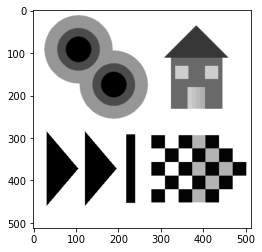

In [3]:
plt.imshow(img, cmap='gray')

Η εικόνα είναι δισδιάστατη με διαστάσεις 512x512.

In [4]:
img.shape

(512, 512)

### 1.1.2

Σύμφωνα με τη σχέση (1) για να πάρουμε PSNR ίσο με 20 πρέπει το εσωτερικό του λογαρίθμου να μας κάνει 10. Αντίστοιχα για να κάνει το PSNR 10 πρέπει το εσωτερικό του λογαρίθμου να είναι ίσο με $\sqrt{10}$. Λύνοντας ως προς $\sigma_n$ βρίσκουμε τις αντίστοιχες τιμές για τις τυπικές αποκλίσεις.

In [5]:
s20 = (img.max() - img.min())/10
s10 = (img.max() - img.min())/np.sqrt(10)

In [6]:
print(s20)
print(s10)

25.5
80.63808033429366


Δημιουργούμε έτσι καινούρια σήματα στα οποία έχουμε προσθέσει τυχαίο θόρυβο μηδενικής μέσης τιμής και τυπικής απόκλισης που βρέθηκε παραπάνω. Κανονικοποιούμε ύστερα το σήμα στο διάστημα [0,1] διαιρώντας με το 255

In [7]:
noise20 = np.random.normal(0,s20, (512,512))
img20 = noise20/255 + img/255
img20 = np.minimum(np.ones((512,512)), img20)
img20 = np.maximum(np.zeros((512,512)), img20)

noise10 = np.random.normal(0,s10, (512,512))
img10 = noise10/255 + img/255
img10 = np.minimum(np.ones((512,512)), img10)
img10 = np.maximum(np.zeros((512,512)), img10)

Text(0.5, 1.0, 'img with WAGN, PSNR=10')

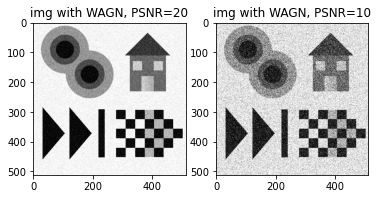

In [8]:
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(img20, cmap='gray')
ax0.set_title('img with WAGN, PSNR=20')

ax1.imshow(img10, cmap='gray')
ax1.set_title('img with WAGN, PSNR=10')

## 1.2. Υλοποίηση Αλγορίθμων Ανίχνευσης Ακμών

### 1.2.1

Θεωρούμε μια τυπική απόκλιση ίση με 2 και ορίζουμε τη διάσταση n από τον τύπο που δίνεται. Καλούμε έπειτα την cv.getGaussianKernel η οποία επιστρέφει ένα Gaussian φίλτρο μεγέθους n.

In [9]:
s=2
n = int(np.ceil(3*s))*2 + 1
Gauss_kernel = cv2.getGaussianKernel(n, s)

Στη συνέχεια με τη βοήθεια της συνάρτησης meshgrid ορίζουμε τη διδιάστατη λαπλασιανή την οποία κεντράρουμε στο 0 και την υπολογίζουμε με βάση τον τύπο της θεωρίας.

In [10]:
import sys

def fspecial_log(p2, std):
    siz = int((p2-1)/2)
    x = y = np.linspace(-siz, siz, 2*siz+1)
    x, y = np.meshgrid(x, y)
    arg = -(x**2 + y**2) / (2*std**2)
    h = np.exp(arg)
    h1 = h*(x**2 + y**2 - 2*std**2) / (std**4)
    return h1

In [11]:
LoG_kernel=fspecial_log(n,s)

## 1.2.2

Φιλτράροντας με το Gauss_kernel βρίσκουμε το $I_{\sigma}$ ενώ φιλτράροντας τα σήματα με το LoG_kernel παίρνουμε την λαπλασιανή της εικόνας. Οι αντίστοιχες ονομασίες αντιστοιχούν στα αποτελέσματα της εικόνας με τον αντίστοιχο θόρυβο.

In [12]:
fil20_gauss = cv2.filter2D(img20,-1,Gauss_kernel)
fil20_laplace = cv2.filter2D(img20,-1,LoG_kernel)

fil10_gauss = cv2.filter2D(img10,-1,Gauss_kernel)
fil10_laplace = cv2.filter2D(img10,-1,LoG_kernel)

Τα αποτελέσματα φαίνονται παρακάτω.

Text(0.5, 1.0, 'Laplacian kernel, PSNR=10')

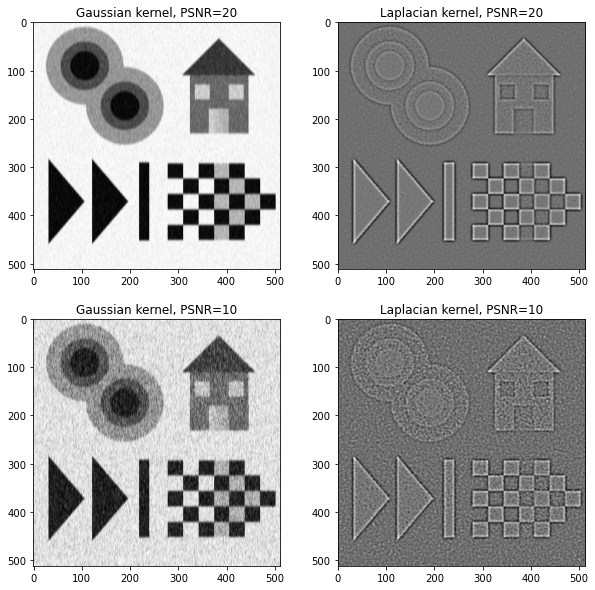

In [13]:
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(10,10))
ax0.imshow(fil20_gauss, cmap='gray')
ax0.set_title('Gaussian kernel, PSNR=20')

ax1.imshow(fil20_laplace, cmap='gray')
ax1.set_title('Laplacian kernel, PSNR=20')

ax2.imshow(fil10_gauss, cmap='gray')
ax2.set_title('Gaussian kernel, PSNR=10')

ax3.imshow(fil10_laplace, cmap='gray')
ax3.set_title('Laplacian kernel, PSNR=10')

Εναλλακτικά για να εκτιμήσουμε την μη γραμμική εκτίμηση της Λαπλασιανής δημιουργούμε αρχικά το γραμμικό φίλτρο Β που μας δίνεται.

In [14]:
B=np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)

In [15]:
fil20_gauss

array([[0.95526039, 0.98321403, 0.96996798, ..., 0.97196925, 0.98598279,
        0.96237067],
       [0.9553892 , 0.98277366, 0.96731742, ..., 0.97386934, 0.98688693,
        0.95821706],
       [0.95462595, 0.98127969, 0.96199821, ..., 0.97825189, 0.98878012,
        0.94746342],
       ...,
       [0.92662944, 0.98018051, 0.96339766, ..., 0.95511832, 0.8779953 ,
        0.98510769],
       [0.92883556, 0.98779581, 0.96282521, ..., 0.95431011, 0.88613504,
        0.99141935],
       [0.93039227, 0.9907712 , 0.96161043, ..., 0.95366541, 0.89036511,
        0.993834  ]])

Σύμφωνα με τη σχέση 3 υπολογίζουμε την μη γραμμική έκδοση της λαπλασιανής με τη βοήθεια των συναρτήσεων erode και dilate της βιβλιοθήκης cv2.

In [16]:
B

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [17]:
erosion20 = cv2.erode(fil20_gauss, B, iterations = 1)
dilation20 = cv2.dilate(fil20_gauss, B, iterations = 1)

erosion10 = cv2.erode(fil10_gauss, B, iterations = 1)
dilation10 = cv2.dilate(fil10_gauss, B, iterations = 1)

In [18]:
L2_20 = erosion20+dilation20-2*fil20_gauss
L2_10 = erosion10+dilation10-2*fil10_gauss

Text(0.5, 1.0, 'L2, PSNR=10')

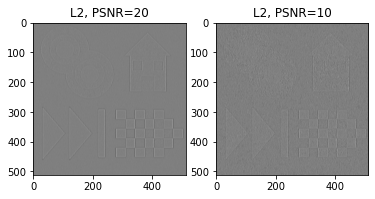

In [19]:
f, (ax0, ax1) = plt.subplots(1,2)
ax0.imshow(L2_20, cmap='gray')
ax0.set_title('L2, PSNR=20')

ax1.imshow(L2_10, cmap='gray')
ax1.set_title('L2, PSNR=10')

### 1.2.3 

(α) Κρατάμε μόνο τα σημεία με θετική τιμή.

In [20]:
fil10_laplace=np.where((fil10_laplace>=0), 1, 0)

In [21]:
fil10_laplace = np.uint8(fil10_laplace)

Υπολογίζουμε το περίγραμμα Y από την σχέση 4.

In [22]:
B=np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)
Y=cv2.dilate(fil10_laplace, B, iterations=1)

In [23]:
Y = Y - cv2.erode(fil10_laplace, B, iterations=1)

Κρατάμε ύστερα τα σημεία με τιμής ίση με 1, τα οποία θα είναι τα ζητούμενα zero crossings.

In [24]:
Y1=np.where(Y==1, 1, 0)

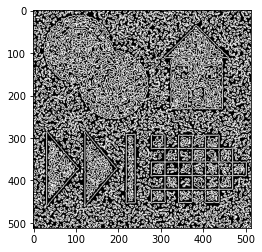

In [25]:
plt.imshow(Y, cmap='gray')

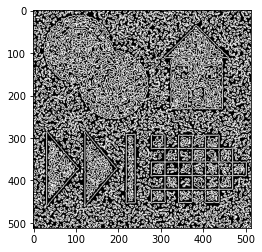

In [26]:
plt.imshow(Y, cmap='gray')

In [27]:
fil10_laplace.shape

(512, 512)

### 1.2.4

Υπολογίζουμε την παράγωγο του σήματος και κρατάμε τα σημεία που ικανοποιούν τη συνθήκη (5).

In [28]:
grad = np.gradient(fil10_gauss)

Μια ιδέα είναι να εφαρμόσουμε την σχέση για τις οριζόντιες και τις κάθετες παραγώγους ξεχωριστά και να εφαρμόσουμε or μεταξύ τους.

In [29]:
theta=0.3
max_grad_hor= np.max(grad[0])
max_grad_perp = np.max(grad[1])
Y2 = np.where(grad[0]>theta*max_grad_hor, 1, 0)
Y3 = np.where(grad[1]>theta*max_grad_perp, 1, 0)

In [30]:
Y = Y1&(Y2|Y3)
print(Y.shape)

(512, 512)


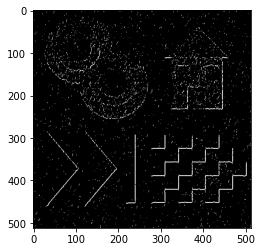

In [31]:
plt.imshow(Y, cmap='gray')

Στην παρακάτω συνάρτηση έχουμε συγκεντώσει όλη την παραπάνω διαδικασία ώστε να είναι δυνατό να καλούμε την EdgeDetect με ορίσματα την εικόνα, την τυπική απόκλιση, την παράμετρο θ όπως επίσης και την επιλογή για χρήση του γραμμικού kernel ή του μη γραμμικού. <br><br>
Αυτή τη φορά χρησιμοποιούμε για νόρμα την L2 στον τύπο 5 για τον υπολογισμό της νόρμας της παραγώγου.

In [32]:
import sys

def fspecial_log(p2, std):
    siz = int((p2-1)/2)
    x = y = np.linspace(-siz, siz, 2*siz+1)
    x, y = np.meshgrid(x, y)
    arg = -(x**2 + y**2) / (2*std**2)
    h = np.exp(arg)
    h1 = h*(x**2 + y**2 - 2*std**2) / (std**4)
    return h1


def EdgeDetect(image, sigma, theta, linear=True):
    n = int(np.ceil(3*sigma))*2 + 1
    Gauss_kernel = cv2.getGaussianKernel(n, sigma)
    fil_gauss = cv2.filter2D(image,-1,Gauss_kernel)
    B=np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)
    if linear:
        LoG_kernel=fspecial_log(n*n,sigma)
        L = cv2.filter2D(image,-1,LoG_kernel)
    else:    
        erosion = cv2.erode(fil_gauss, B, iterations = 1)
        dilation = cv2.dilate(fil_gauss, B, iterations = 1)
        L = erosion+dilation-2*fil_gauss
    #plt.imshow(L, cmap='gray')
    
    X = np.where(L>0, 1, 0)
    X = np.uint8(X)
    
    erosion = cv2.erode(X, B, iterations = 1)
    dilation = cv2.dilate(X, B, iterations = 1)
    Y = dilation-erosion
    
    ZeroCrossings = np.where(Y==1, 1, 0)
    grad = np.gradient(fil_gauss)
    
    squarer = lambda t: t ** 2
    vfunc = np.vectorize(squarer)
    
    norm = np.sqrt(vfunc(grad[0]) + vfunc(grad[1]))
    
    max_grad= np.max(norm)
    regulars = np.where(norm>theta*max_grad, 1, 0)
    
    edges = ZeroCrossings & regulars
    f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,10))
    ax0.imshow(image, cmap='gray')
    ax0.set_title('input image')
    ax1.imshow(edges, cmap='gray')
    ax1.set_title('output image with edges')
    f1, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 5, figsize=(10,10))
    ax2.imshow(X, cmap='gray')
    ax2.set_title('X')
    ax3.imshow(Y, cmap='gray')
    ax3.set_title('Y')
    ax4.imshow(norm, cmap='gray')
    ax4.set_title('norm')
    ax5.imshow(ZeroCrossings, cmap='gray')
    ax5.set_title('Zero Crossings')
    ax6.imshow(regulars, cmap='gray')
    ax6.set_title('regular points')
    return edges

def EdgeDetectOut(image, sigma, theta, linear=True):
    n = int(np.ceil(3*sigma))*2 + 1
    Gauss_kernel = cv2.getGaussianKernel(n, sigma)
    fil_gauss = cv2.filter2D(image,-1,Gauss_kernel)
    B=np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)
    if linear:
        LoG_kernel=fspecial_log(n*n,sigma)
        L = cv2.filter2D(image,-1,LoG_kernel)
    else:    
        erosion = cv2.erode(fil_gauss, B, iterations = 1)
        dilation = cv2.dilate(fil_gauss, B, iterations = 1)
        L = erosion+dilation-2*fil_gauss
    #plt.imshow(L, cmap='gray')
    
    X = np.where(L>0, 1, 0)
    X = np.uint8(X)
    
    erosion = cv2.erode(X, B, iterations = 1)
    dilation = cv2.dilate(X, B, iterations = 1)
    Y = dilation-erosion
    
    ZeroCrossings = np.where(Y==1, 1, 0)
    grad = np.gradient(fil_gauss)
    
    squarer = lambda t: t ** 2
    vfunc = np.vectorize(squarer)
    
    norm = np.sqrt(vfunc(grad[0]) + vfunc(grad[1]))
    
    max_grad= np.max(norm)
    regulars = np.where(norm>theta*max_grad, 1, 0)
    
    edges = ZeroCrossings & regulars
    
    return edges

Τυπώνουμε και κάποια ενδιάμεσα βήματα για να φαίνεται η πορεία της επεξεργασίας. Τρέχουμε έτσι τις 2 περιπτώσεις (γραμμική ή μη γραμμική) για τις 2 εικόνες με θόρυβο. Τα αποτελέσματα φαίνονται παρακάτω.

linear kernel, PSNR=20


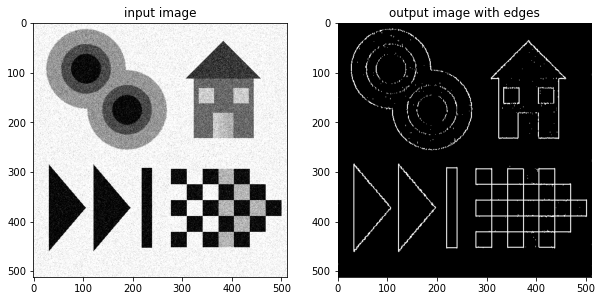

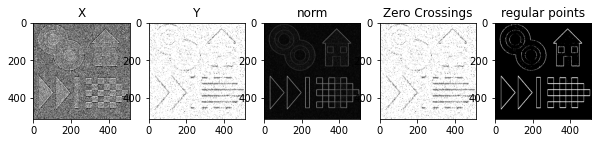

In [33]:
print("linear kernel, PSNR=20")
Lin20 = EdgeDetect(img20, 1.5, 0.18, False)

non linear kernel, PSNR=20


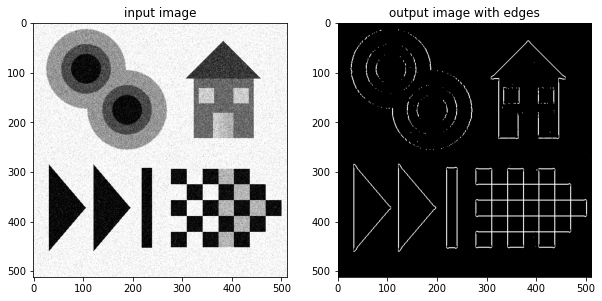

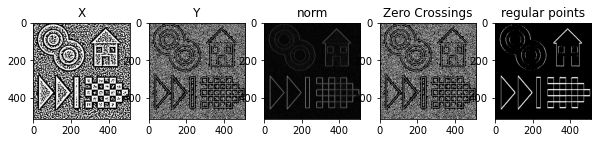

In [34]:
print("non linear kernel, PSNR=20")
NonLin20 = EdgeDetect(img20, 2.5, 0.15, True)

linear kernel, PSNR=10


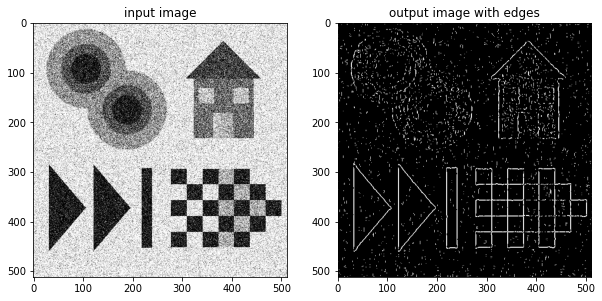

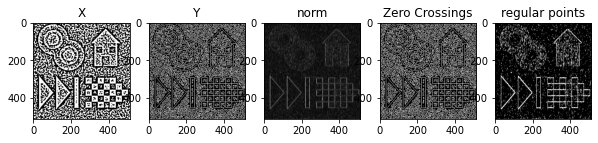

In [35]:
print("linear kernel, PSNR=10")
Lin10 = EdgeDetect(img10, 3, 0.18, True)

non linear kernel, PSNR=10


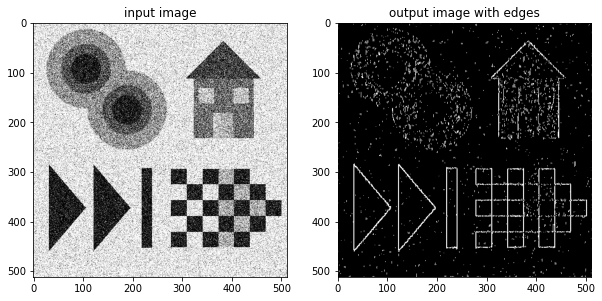

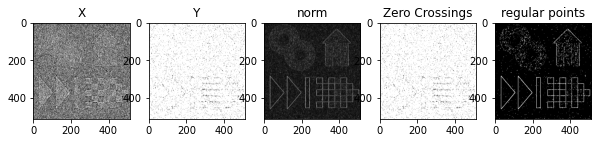

In [36]:
print("non linear kernel, PSNR=10")
NonLin10 = EdgeDetect(img10, 1.8, 0.3, False)

## 1.3. Αξιολόγηση των Αποτελεσμάτων Ανίχνευσης Ακμών

### 1.3.1 

Σε αυτό το βήμα βρίσκουμε τις αληθινές ακμές βρίσκοντας το περιγραμμα ακριβώς όπως και πριν και εφαρμόζοντας έπειτα ένα threshold. 

In [37]:
B=np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)
erosion = cv2.erode(img, B, iterations = 1)
dilation = cv2.dilate(img, B, iterations = 1)
M = dilation-erosion

Όπως φαίνεται παρακάτω έχουμε όντως ακριβώς το περίγραμμα της εικόνας εισόδου.

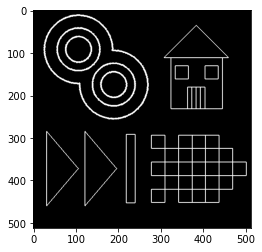

In [38]:
theta = 0.1
T = np.where(M>theta, 1, 0)
plt.imshow(T, cmap='gray')

### 1.3.2 

Υπολογίζουμε τις πιθανόητες μετρώντας το σύνολο των σημείων που ικανοποιούν στη συνθήκη, δηλαδή έχουν τιμή 1 με τη συνάρτηση sum. Τιμές κοντά στο 1 είναι προτιμότερες.

In [39]:
Precision = (T&NonLin20).sum()/NonLin20.sum()
Recall = (T&NonLin20).sum()/T.sum()
C_nonlin20 = (Precision + Recall) / 2
print("C for non linear Laplacian and PSNR 20: ", C_nonlin20)

Precision = (T&Lin20).sum()/Lin20.sum()
Recall = (T&Lin20).sum()/T.sum()
C_lin20 = (Precision + Recall) / 2
print("C for linear Laplacian and PSNR 20: ", C_lin20)

Precision = (T&NonLin10).sum()/NonLin10.sum()
Recall = (T&NonLin10).sum()/T.sum()
C_nonlin10 = (Precision + Recall) / 2
print("C for non linear Laplacian and PSNR 10: ", C_nonlin10)

Precision = (T&Lin10).sum()/Lin10.sum()
Recall = (T&Lin10).sum()/T.sum()
C_lin10 = (Precision + Recall) / 2
print("C for linear Laplacian and PSNR 10: ", C_lin10)

C for non linear Laplacian and PSNR 20:  0.7682096267380182
C for linear Laplacian and PSNR 20:  0.7749188842042243
C for non linear Laplacian and PSNR 10:  0.4929585860880915
C for linear Laplacian and PSNR 10:  0.5017411612119098


In [40]:
def metric(edge):
    Precision = (T&edge).sum()/edge.sum()
    Recall = (T&edge).sum()/T.sum()
    return (Precision + Recall) / 2
    
def varySigma(im):
    f1, ax = plt.subplots(1, 7, figsize=(20,10))
    ms=[];
    for c, s in enumerate(np.arange(0.5, 4, 0.5)):
        inp = EdgeDetectOut(im, s, 0.2, False)
        ax[c].imshow(inp, cmap='gray')
        ax[c].set_title('sigma = '+ str(s))
        ms.append(metric(inp))
    plt.figure()
    plt.plot(np.arange(0.5, 4, 0.5),ms)
    plt.ylabel('metric')
    plt.xlabel('sigma')
    plt.title('theta=0.2, linear=True')
    plt.show()
    
    
def varyTheta(im):
    f1, ax = plt.subplots(1, 9, figsize=(20,10))
    ms=[]
    for c, t in enumerate(np.arange(0.05, 0.5, 0.05)):
        inp = EdgeDetectOut(im, 2, t, False)
        ax[c].imshow(inp, cmap='gray')
        ax[c].set_title('theta = '+ str(t)[:4])
        ms.append(metric(inp))
    plt.figure()
    plt.plot(np.arange(0.05, 0.5, 0.05), ms)
    plt.ylabel('metric')
    plt.xlabel('theta')
    plt.title('sigma=2, linear=True')        

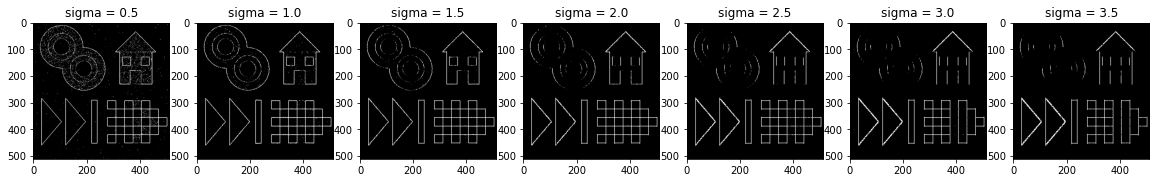

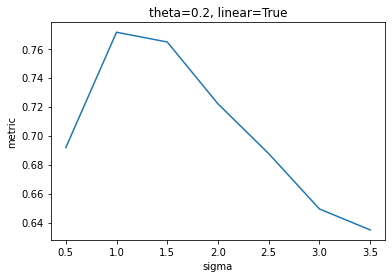

In [41]:
varySigma(img20)

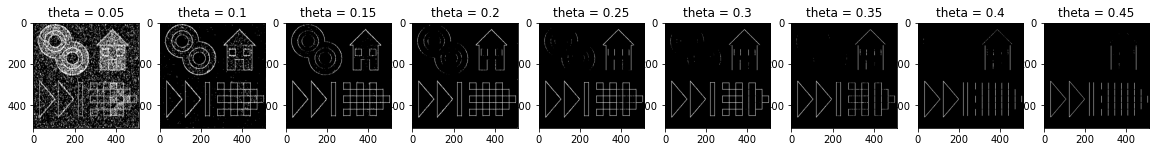

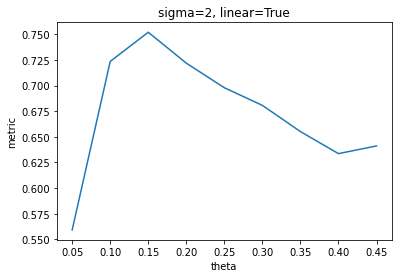

In [42]:
varyTheta(img20)

### 1.4.1 

Πράγματι η μέθοδος αποδίδει και στην πραγματική εικόνα που απεικονίζει την πεταλούδα.

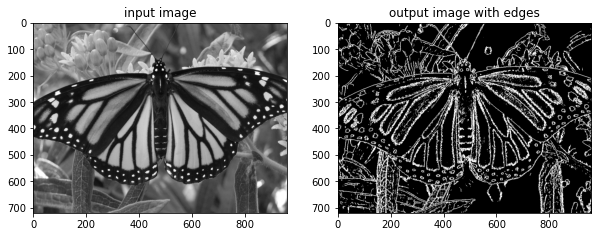

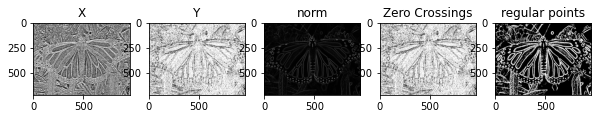

In [43]:
path = "butterfly.jpg"

# Using cv2.imread() method 
real_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
real_img=real_img/255

edge=EdgeDetect(real_img, 1, 0.05, False)

202563


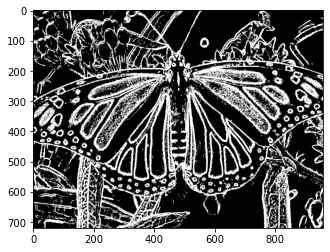

In [44]:
B=np.array([[0,1,0], [1,1,1], [0,1,0]], dtype=np.uint8)
erosion = cv2.erode(real_img, B, iterations = 1)
dilation = cv2.dilate(real_img, B, iterations = 1)
M = dilation-erosion
theta = 0.05
T = np.where(M>theta, 1, 0)
plt.imshow(T, cmap='gray')
print(T.sum())

In [45]:
metric(edge)

0.7686213854614601

In [46]:
def varySigmaReal(im):
    f1, ax = plt.subplots(1, 7, figsize=(20,10))
    ms=[];
    for c, s in enumerate(np.arange(0.5, 4, 0.5)):
        inp = EdgeDetectOut(im, s, 0.05, True)
        ax[c].imshow(inp, cmap='gray')
        ax[c].set_title('sigma = '+ str(s))
        ms.append(metric(inp))
    plt.figure()
    plt.plot(np.arange(0.5, 4, 0.5),ms)
    plt.ylabel('metric')
    plt.xlabel('sigma')
    plt.title('theta=0.2, linear=True')
    plt.show()
    
    
def varyThetaReal(im):
    f1, ax = plt.subplots(1, 9, figsize=(20,10))
    ms=[]
    for c, t in enumerate(np.arange(0, 0.18, 0.02)):
        inp = EdgeDetectOut(im, 1, t, True)
        ax[c].imshow(inp, cmap='gray')
        ax[c].set_title('theta = '+ str(t)[:4])
        ms.append(metric(inp))
    plt.figure()
    plt.plot(np.arange(0.05, 0.5, 0.05), ms)
    plt.ylabel('metric')
    plt.xlabel('theta')
    plt.title('sigma=2, linear=True')    

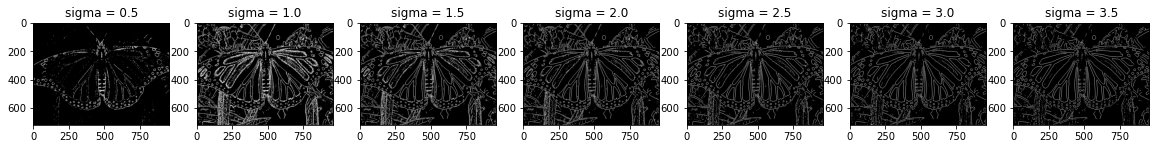

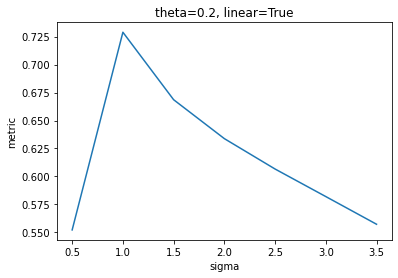

In [47]:
varySigmaReal(real_img)

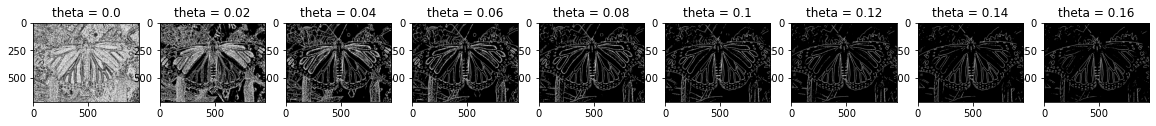

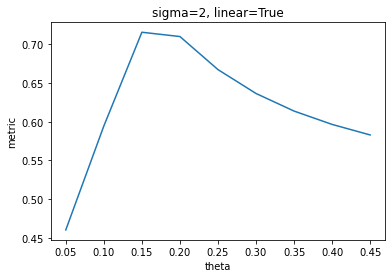

In [48]:
varyThetaReal(real_img)

# Μέρος 2: Ανίχνευση Σημείων Ενδιαφέροντος (Interest Point Detection)

## 2.1. Ανίχνευση Γωνιών

### 2.1.1

Διαβάζουμε αρχικά τις 2 εικόνες με τις οποίες θα εργαστούμε. Τις χρειαζόμαστε σε χρώμα ώστε να τις δίνουμε ως όρισμα στην συνάρτηση interest_points_visualization, ενώ τις διαβάζουμε και σε gray scale ώστε να μπορούμε να τις επεξεργαστούμε σε μία διάσταση.

In [49]:
car = cv2.imread('Caravaggio2.jpg', cv2.IMREAD_COLOR) 
sun = cv2.imread('sunflowers.png', cv2.IMREAD_COLOR)

In [50]:
car_gray = cv2.imread('Caravaggio2.jpg', cv2.IMREAD_GRAYSCALE) 
sun_gray = cv2.imread('sunflowers.png', cv2.IMREAD_GRAYSCALE)

Φορτώνουμε τον βοηθητικό κώδικα με την εντολή %load cv20_lab1_part2_utils.py

In [51]:
# %load cv20_lab1_part2_utils.py
#!/usr/bin/env python

import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def interest_points_visualization(I_, kp_data_, ax=None):
    '''
    Plot keypoints chosen by detectos on image.
    Args:
        I_: Image (if colored, make sure it is in RGB and not BGR).
        kp_data_: Nx3 array, as described in assignment.
        ax: Matplotlib axis to plot on (if None, a new Axes object is created).
    Returns:
        ax: Matplotlib axis where the image was plotted.
    '''
    try:
        I = np.array(I_)
        kp_data = np.array(kp_data_)
    except:
        print('Conversion to numpy arrays failed, check if the inputs (image and keypoints) are in the required format.')
        exit(2)

    try:
        assert(len(I.shape) == 2 or (len(I.shape) == 3 and I.shape[2] == 3))
    except AssertionError as e:
        print('interest_points_visualization: Image must be either a 2D matrix or a 3D matrix with the last dimension having size equal to 3.', file=sys.stderr)
        exit(2)

    try:
        assert(len(kp_data.shape) == 2 and kp_data.shape[1] == 3)
    except AssertionError as e:
        print('interest_points_visualization: kp_data must be a 2D matrix with 3 columns.', file=sys.stderr)
        exit(2)

    if ax is None:
        _, ax = plt.subplots()

    ax.set_aspect('equal')
    ax.imshow(I)
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

    for i in range(len(kp_data)):
        x, y, sigma = kp_data[i]
        circ = Circle((x, y), 3*sigma, edgecolor='g', fill=False, linewidth=2)
        ax.add_patch(circ)

    return ax

def disk_strel(n):
    '''
        Return a structural element, which is a disk of radius n.
    '''
    r = int(np.round(n))
    d = 2*r+1
    x = np.arange(d) - r
    y = np.arange(d) - r
    x, y = np.meshgrid(x,y)
    strel = x**2 + y**2 <= r**2
    return strel.astype(np.uint8)


Εισάγουμε τις ενδεικτικές τιμές των παραμέτρων που δίνονται στην εκφώνηση της άσκησης.

In [52]:
N = 4
sigma = 2
r = 2.5
k = 0.05
u_corn = 0.005
s = 1.5

n = int(np.ceil(3*sigma))*2 + 1
Gs = cv2.getGaussianKernel(n, sigma)
Gr = cv2.getGaussianKernel(n, r)

Εύκολα υπολογίζουμε το Ισ ως το αποτέλεσμα του φιλτραρίσματος της αρχικής εικόνας με το Γκαουσιανό φίλτρο.

In [53]:
Is = cv2.filter2D(car_gray,-1,Gs)
Is_sun=cv2.filter2D(sun_gray,-1,Gs)

Η παράγωγος του Iσ αποτελείται από 2 πίνακες ίδιου μεγέθους με την εικόνα. Η πρώτη είναι η μερική παράγωγος ως προς x και η δεύτερη ως προς y.

In [54]:
dIs = np.gradient(Is)
dIs_sun = np.gradient(Is_sun)

Έχοντας τα παραπάνω απλά εκτελούμε τους τύπους που δίνονται, όπου η filter2d είναι η συνέλιξη και ο πολλαπλασιασμός γίνεται με την multiply της numpy.

In [55]:
J1 = cv2.filter2D(np.multiply(dIs[0], dIs[0]),-1,Gr)
J2 = cv2.filter2D(np.multiply(dIs[0], dIs[1]),-1,Gr)
J3 = cv2.filter2D(np.multiply(dIs[1], dIs[1]),-1,Gr)

J1_sun = cv2.filter2D(np.multiply(dIs_sun[0], dIs_sun[0]),-1,Gr)
J2_sun = cv2.filter2D(np.multiply(dIs_sun[0], dIs_sun[1]),-1,Gr)
J3_sun = cv2.filter2D(np.multiply(dIs_sun[1], dIs_sun[1]),-1,Gr)

Text(0.5, 1.0, 'J3')

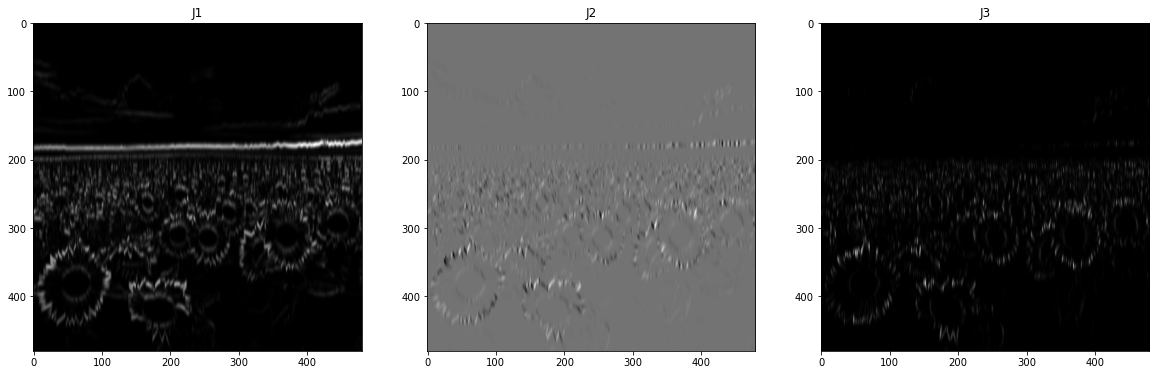

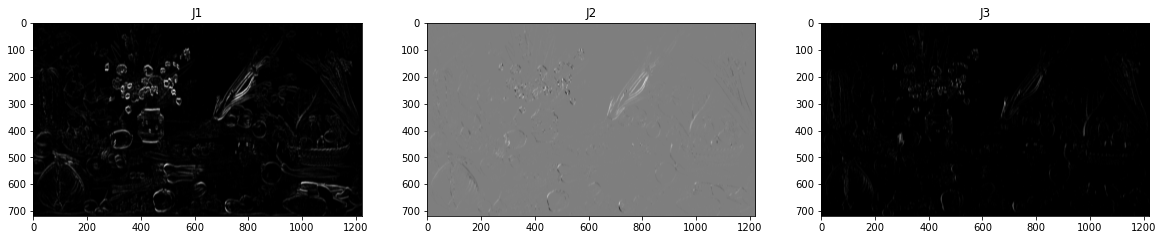

In [56]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,20))
ax0.imshow(J1_sun, cmap='gray')
ax0.set_title('J1')
ax1.imshow(J2_sun, cmap='gray')
ax1.set_title('J2')
ax2.imshow(J3_sun, cmap='gray')
ax2.set_title('J3')

f1, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,20))
ax0.imshow(J1, cmap='gray')
ax0.set_title('J1')
ax1.imshow(J2, cmap='gray')
ax1.set_title('J2')
ax2.imshow(J3, cmap='gray')
ax2.set_title('J3')

### 2.1.2

Έχοντας πάλι τα ζητούμενα μεγέθη απλά εκτελούμε τον τύπο ώστε να βρούμε τα 2 μεγέθη λ. Προτιμάμε τις συναρτήσεις της numpy που εκτελούν πράξεις σημείο προς σημείο.

In [57]:
D = np.sqrt(np.square(J1-J3)+4*np.square(J2))
l_plus = (J1 + J3 + D) / 2
l_minus = (J1 + J3 - D) / 2

D_sun = np.sqrt(np.square(J1_sun-J3_sun)+4*np.square(J2_sun))
l_plus_sun = (J1_sun + J3_sun + D_sun) / 2
l_minus_sun = (J1_sun + J3_sun - D_sun) / 2

Τυπώνουμε τα 2 μεγέθη λ μαζί με την αρχική εικόνα. Και οι δύο εικόνες δείχνουν περιγράμματα κάποιων σχημάτων της εικόνας, κυρίως αυτών με μεγαλύτερη φωτεινότητα.

Text(0.5, 1.0, 'l_minus')

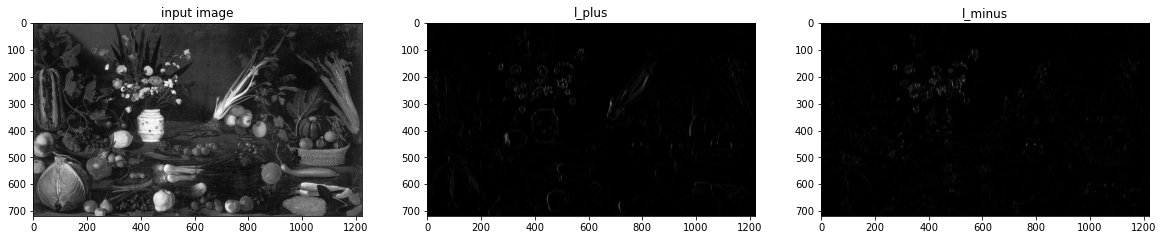

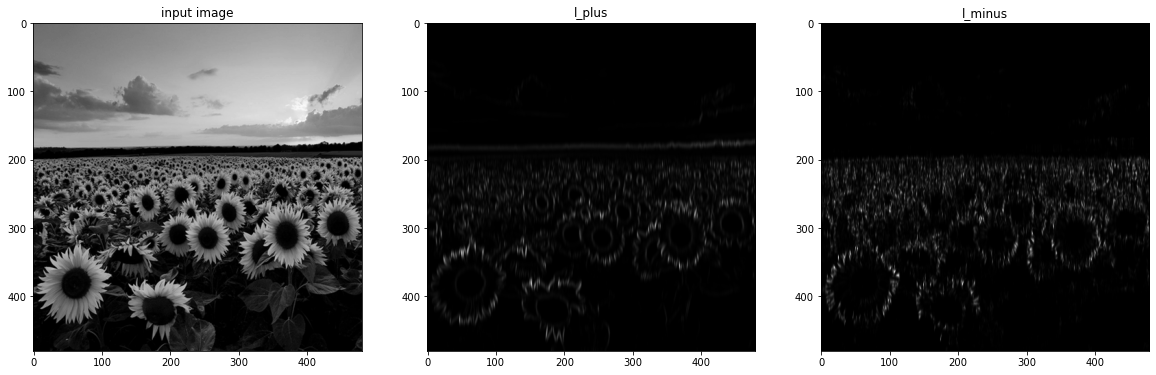

In [58]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,20))
ax0.imshow(car_gray, cmap='gray')
ax0.set_title('input image')
ax1.imshow(l_plus, cmap='gray')
ax1.set_title('l_plus')
ax2.imshow(l_minus, cmap='gray')
ax2.set_title('l_minus')

f1, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,20))
ax0.imshow(sun_gray, cmap='gray')
ax0.set_title('input image')
ax1.imshow(l_plus_sun, cmap='gray')
ax1.set_title('l_plus')
ax2.imshow(l_minus_sun, cmap='gray')
ax2.set_title('l_minus')

### 2.1.3

Ακολουθούμε στη συνέχεια τον τύπο (10) για τον υπολογισμό του R.

In [59]:
R = np.multiply(l_plus, l_minus) - k*np.square(l_minus + l_plus)
R_sun = np.multiply(l_plus_sun, l_minus_sun)- k*np.square(l_minus_sun + l_plus_sun)

Παρακάτω είναι ο κώδικας για την συνθήκη Σ1 όπως δίνεται στην εκφώνηση.

In [60]:
ns = np.ceil(3*sigma)*2+1
B_sq = disk_strel(ns)
Cond1 = ( R==cv2.dilate(R,B_sq) )

Cond1_sun = ( R_sun==cv2.dilate(R_sun,B_sq) )

In [61]:
print(np.sum(Cond1==True))
np.sum(Cond1_sun==True)

1101


307

In [62]:
R_max = np.max(R)
Cond2 = np.where(R>u_corn*R_max, 1, 0)

R_max_sun = np.max(R_sun)
Cond2_sun = np.where(R_sun>u_corn*R_max_sun, 1, 0)

In [63]:
print(np.sum(Cond2==1))
np.sum(Cond2_sun==True)

7425


20948

Παρακάτω είναι ο κώδικας για τη συνθήκη Σ2. Χρησιμοποιούμε τη συνάρτηση where η οποία στην ουσία δημιουργεί έναν καινούριο πίνακα με δυαδικές τιμές αναλόγως με τη συνθήκη στο πρώτο όρισμα. Εν προκειμένω είναι η R(x,y) > θ*R_max

In [64]:
Cond = Cond1&Cond2
print(np.sum(Cond==True))

Cond_sun = Cond1_sun&Cond2_sun
print(np.sum(Cond_sun==True))

258
128


Σκοπός τώρα για αυτό το βήμα είναι να δώσουμε το κατάλληλο όρισμα στην συνάρτηση που δίνει τις γωνίες. Για τον λόγο αυτό φτιάχνουμε αρχικά έναν πίνακα τον οποίο γεμίζουμε με τη διασπορά με την οποία δουλεύουμε.

In [65]:
points = np.sum(Cond==True)
scale = np.zeros(points)
scale.fill(sigma)

points = np.sum(Cond_sun==True)
scale_sun = np.zeros(points)
scale_sun.fill(sigma)

Η παρακάτω συνάρτηση φτιάχνει τον πίνακα Νx3 όπου η δεύτερη στήλη είναι οι x-συντεταγμένες και η πρώτη στήλη είναι οι y-συντεταγμένες. Ο πίνακας C που δέχεται ως όρισμα είναι το σύνολο των σημείων που έχουμε συλλέξει από την παραπάνω διαδικασία για τη συγκεκριμένη εικόνα ενώ ο scales έχει τις τιμές του σ.

In [66]:
def makeN3(C, scales):
    num_of_points=scales.shape[0]
    N2 = np.zeros((num_of_points, 2))
    print(num_of_points)
    a = np.where(C==1)
    for j in range(len(a[0])):
        N2[j,1]=a[0][j]
        N2[j,0]=a[1][j]
    scales = np.expand_dims(scales, axis=1)
    return np.concatenate((N2, scales), axis=1)

In [67]:
makeN3(Cond,scale)

258


array([[ 377.,    3.,    2.],
       [ 364.,   28.,    2.],
       [ 330.,   50.,    2.],
       [ 375.,   68.,    2.],
       [ 343.,   75.,    2.],
       [ 580.,  104.,    2.],
       [ 228.,  113.,    2.],
       [ 382.,  114.,    2.],
       [ 562.,  115.,    2.],
       [ 364.,  119.,    2.],
       [ 546.,  125.,    2.],
       [ 574.,  136.,    2.],
       [ 377.,  138.,    2.],
       [1140.,  140.,    2.],
       [ 847.,  146.,    2.],
       [1180.,  147.,    2.],
       [ 521.,  150.,    2.],
       [1116.,  151.,    2.],
       [ 491.,  154.,    2.],
       [ 535.,  159.,    2.],
       [ 280.,  161.,    2.],
       [ 318.,  161.,    2.],
       [1155.,  164.,    2.],
       [1124.,  167.,    2.],
       [ 411.,  171.,    2.],
       [ 443.,  172.,    2.],
       [ 829.,  173.,    2.],
       [  38.,  175.,    2.],
       [ 347.,  176.,    2.],
       [ 474.,  176.,    2.],
       [ 490.,  176.,    2.],
       [ 334.,  179.,    2.],
       [ 318.,  181.,    2.],
       [ 8

258


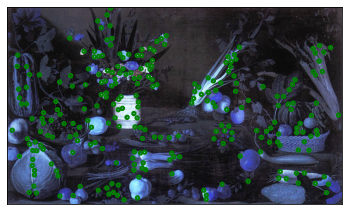

In [68]:
interest_points_visualization(car, makeN3(Cond,scale))

128


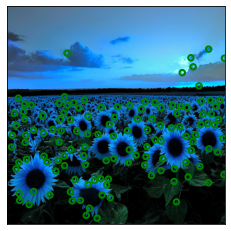

In [69]:
interest_points_visualization(sun, makeN3(Cond_sun,scale_sun))

## 2.2. Πολυκλιμακωτή Ανίχνευση Γωνιών

### 2.2.1

Αρχικά συνοψίζουμε την ανίχνευση γωνιών μίας κλίμακας του προηγούμενου ερωτήματος σε μία συνάρτηση Cornerness που παίρνει ως είσοδο μια εικόνα, μια τιμή για τη διασπορά και μία τιμή για το r και επιστρέφει τον δυαδικό πίνακα όπου τα επιλεγμένα pixels έχουν τιμή 1 και τα υπόλοιπα 0.

In [70]:
def Cornerness(img, sigma, r):
    k = 0.05
    u_corn = 0.005

    n = int(np.ceil(3*sigma))*2 + 1
    Gs = cv2.getGaussianKernel(n, sigma)
    Gr = cv2.getGaussianKernel(n, r)
    Is = cv2.filter2D(img,-1,Gs)
    dIs = np.gradient(Is)
    J1 = cv2.filter2D(np.multiply(dIs[0], dIs[0]),-1,Gr)
    J2 = cv2.filter2D(np.multiply(dIs[0], dIs[1]),-1,Gr)
    J3 = cv2.filter2D(np.multiply(dIs[1], dIs[1]),-1,Gr)
    D = np.sqrt(np.square(J1-J3)+4*np.square(J2))
    l_plus = (J1 + J2 + D) / 2
    l_minus = (J1 + J2 - D) / 2
    
    R = np.multiply(l_plus, l_minus) - k*np.square(l_minus + l_plus)
    ns = np.ceil(3*sigma)*2+1
    B_sq = disk_strel(ns)
    Cond1 = ( R==cv2.dilate(R,B_sq) )
    R_max = np.max(R)
    Cond2 = np.where(R>u_corn*R_max, 1, 0)
    Cond = Cond1&Cond2
    return Cond

Δημιουργούμε έτσι έναν πίνακα με όλες τις τιμές σ και ρ που ζητούνται. Ύστερα καλούμε την μονοκλιμακωτη ανίχνευση γωνιών με την προηγούμενη συνάρτηση και τις αποθηκεύουμε σε μία λίστα.

In [71]:
N=4
s = 1.5
sigmas = [sigma*(s**i) for i in range(N)]
rs = [r*(s**i) for i in range(N)]
Angles = [Cornerness(car_gray, sigmas[i], rs[i]) for i in range(N)]

In [72]:
Angles[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

Όπως και στο προηγούμενο ερώτημα, φτιάχνουμε τα αποτελέσματα σε κατάλληλη μορφή ώστε να δοθούν ως όρισμα στην interest_points_visualization. Αυτό το επιτυγχάνουμε με παρόποιο τρόπο με πριν αλλά συνενώνοντας τους πίνακες που προκύπτουν από τις διαφορετικές κλίμακες. <br><br>
Επιστρέφουμε επίσης ένα array από indices ώστε να μπορούμε να βρίσκουμε τα αντίστοιχα σ ή ρ στην αρχική λίστα.

In [73]:
def makeN3poly(A, sigmas):
    total = np.zeros((0,3))
    indices=np.zeros((0))
    for count, i in enumerate(A):
        points = np.sum(i==True)
        scale = np.zeros(points)
        scale.fill(sigmas[count])
        ind = np.zeros(points)
        ind.fill(count)
        total=np.concatenate((total, makeN3(i, scale)), axis=0)
        indices=np.concatenate((indices, ind), axis=0)
    return total, indices

In [74]:
a, b = makeN3poly(Angles, sigmas)

413
226
128
70


### 2.2.2

Υπολογίζουμε αρχικά τις λαπλασιανές με τον μη γραμμικό τρόπο από την συνάρτηση που ορίσαμε στο πρώτο μέρος. Βρίσκουμε έτσι Ν φίλτρα, όσα και οι τιμές για τη διασπορά σ. Στη συνέχεια περνάμε την εικόνα μας μέσα από αυτά τα φίλτρα και αποθηκεύουμε τα αποτελέσματα.

In [75]:
LoGs = [np.abs(fspecial_log(n,x))*(x**2) for x in sigmas]
Ls = [cv2.filter2D(car_gray,-1,LoGs[i]) for i in range(N)]
Ls_sun = [cv2.filter2D(sun_gray,-1,LoGs[i]) for i in range(N)]

In [76]:
sun_gray.shape

(480, 480)

Τελικά απορρίπτουμε τα σημεία τα οποία δεν είναι μέγιστα στη γειτονία τους σε ό,τι αφορά πάντα την λαπλασιανή των εικόνων. Συγκεκριμένα αποθηκεύουμε τις indexes των σημείων που προκειται να απορριφθούν σε μια λίστα και αφαιρούμε τις αντίστοιχες σειρές από τον πίνακα arguement τον οποίο θα δώσουμε ως όρισμα στην συνάρτηση οπτικοποίησης.

413
226
128
70
[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609,

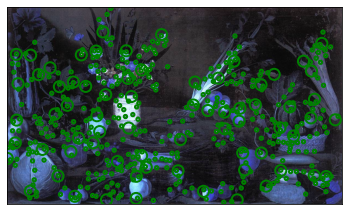

In [77]:
deletion=[]
count=0
argument, si_round=makeN3poly(Angles, sigmas)
for a, pos in zip(argument, si_round):
    x, y, si = a
    x = int(x)
    y = int(y)
    pos=int(pos)
    if pos==0:
        if Ls[pos+1][y,x]>Ls[pos][y,x]:
            deletion.append(count)
    elif pos==N-1:
        if Ls[pos-1][y,x]>Ls[pos][y,x]:
            deletion.append(count)
    else:
        #print(Ls[pos-1][y,x],Ls[pos][y,x],Ls[pos+1][y,x])
        if Ls[pos+1][y,x]>=Ls[pos][y,x] and Ls[pos-1][y,x]>=Ls[pos][y,x]:
            deletion.append(count)
    count+=1
    
print(deletion)
argument=np.delete(argument, deletion, 0)
print(len(deletion))
interest_points_visualization(car, argument)

Πράγματι προκύπτει πίνακας με πολλαπλά μεγέθη κύκλων που αντιστοιχούν σε διαφορετικές κλίμακες. Παραπάνω έχουμε τυπώσει και τα σημεία τα οποία απορρίφθηκαν.<br><br>
Προσαρμόζουμε την παραπάνω διαδικασία σε μία συνάρτηση και βλέπουμε το αποτέλεσμα για την άλλη εικόνα.

In [78]:
Angles_sun = [Cornerness(sun_gray, sigmas[i], rs[i]) for i in range(N)]

In [79]:
Angles_sun[0].shape

(480, 480)

Ο έλεγχος γίνεται για κάθε σημείο στα αντίστοιχα pixels των γειτονικών Λαπλασιανών. Για την πρώτη και τελευταία Λαπλασιανή εξετάζουμε μόνο τον ένα μοναδικό γείτονα.

In [80]:
def delete_points(A, sigmas, Ls):
    deletion=[]
    count=0
    ar, si_round=makeN3poly(A, sigmas)
    for a, pos in zip(ar, si_round):
        x, y, si = a
        x = int(x)
        y = int(y)
        pos=int(pos)
        if pos==0:
            if Ls[pos+1][y,x]>Ls[pos][y,x]:
                deletion.append(count)
        elif pos==N-1:
            if Ls[pos-1][y,x]>Ls[pos][y,x]:
                deletion.append(count)
        else:
            #print(Ls[pos-1][y,x],Ls[pos][y,x],Ls[pos+1][y,x])
            if Ls[pos+1][y,x]>=Ls[pos][y,x] and Ls[pos-1][y,x]>=Ls[pos][y,x]:
                deletion.append(count)
        count+=1
    print(deletion)
    ar=np.delete(ar, deletion, 0)
    print(len(deletion))
    return ar

166
97
47
21
[166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309]
144


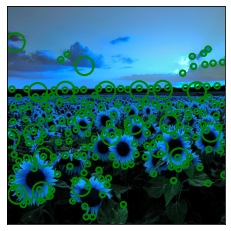

In [81]:
argument = delete_points(Angles_sun,sigmas, Ls_sun)
interest_points_visualization(sun, argument)

## 2.3. Ανίχνευση Blobs

### 2.3.1

Υπολογίζουμε τις μερικές παραγώγους με την συνάρτηση np.gradient. Η είσοδς Ισ έχει υπολογιστεί σε προηγούμενα ερωτήματα. Για τις δεύτερες παραγώγους παραγωγίζουμε 2 φορές.

In [82]:
Lx, Ly = np.gradient(Is)
Lxx, Lxy = np.gradient(Lx)
Lyx, Lyy = np.gradient(Ly)

Η ορίζουσα του πίνακα υπολογίζεται στοιχειωδώς από τον ορισμό ορίζουσας πίνακα 2x2.

In [83]:
CriterionR = np.multiply(Lxx, Lyy) - np.multiply(Lxy, Lyx)

In [84]:
Lx, Ly = np.gradient(Is_sun)
Lxx, Lxy = np.gradient(Lx)
Lyx, Lyy = np.gradient(Ly)
CriterionR_sun = np.multiply(Lxx, Lyy) - np.multiply(Lxy, Lyx)

In [85]:
np.sum(CriterionR)

-3559.0

### 2.3.2

Εφαρμόζουμε στη συνέχεια τις συνθήκες Σ1, Σ2 που εφαρμόσαμε και στο πρώτο ερώτημα του δεύτερου μέρους με τον ίδιο κώδικα.

In [86]:
ns = np.ceil(3*sigma)*2+1
B_sq = disk_strel(ns)
Cond1 = ( CriterionR==cv2.dilate(CriterionR,B_sq) )
print(np.sum(Cond1))

u_corn = 0.05
R_max = np.max(CriterionR)
Cond2 = np.where(CriterionR>u_corn*R_max, 1, 0)
print(np.sum(Cond2))

Cond = Cond1&Cond2
print(np.sum(Cond))

1366
7817
549


549


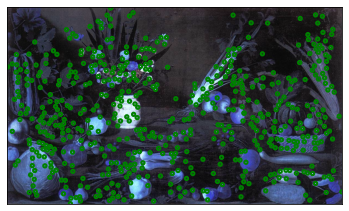

In [87]:
points = np.sum(Cond==True)
scale = np.zeros(points)
scale.fill(sigma)
argument=makeN3(Cond, scale)
interest_points_visualization(car, argument)

525
46674
277
277


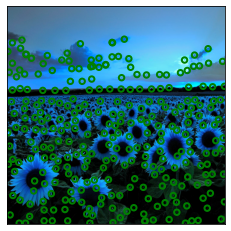

In [88]:
Cond1 = ( CriterionR_sun==cv2.dilate(CriterionR_sun,B_sq) )
print(np.sum(Cond1))

u_corn = 0.001
R_max = np.max(CriterionR_sun)
Cond2 = np.where(CriterionR_sun>u_corn*R_max, 1, 0)
print(np.sum(Cond2))

Cond = Cond1&Cond2
print(np.sum(Cond))

points = np.sum(Cond==True)
scale = np.zeros(points)
scale.fill(sigma)
argument=makeN3(Cond, scale)
interest_points_visualization(sun, argument)

## 2.4 Πολυκλιμακωτή Ανίχνευση Blobs

### 2.4.1

Αρχικά συνοψίζουμε την παραπάνω μέθοδο σε μία συνάρτηση ώστε να μπορέσουμε να την καλέσουμε για τις 2 εικόνες που εξετάζουμε.

In [89]:
def MultiCornerness(img, sigma, r, u_corn):

    n = int(np.ceil(3*sigma))*2 + 1
    Gs = cv2.getGaussianKernel(n, sigma)
    Gr = cv2.getGaussianKernel(n, r)
    Is = cv2.filter2D(img,-1,Gs)

    Lx, Ly = np.gradient(Is)
    Lxx, Lxy = np.gradient(Lx)
    Lyx, Lyy = np.gradient(Ly)

    CriterionR = np.multiply(Lxx, Lyy) - np.multiply(Lxy, Lyx)
    
    ns = np.ceil(3*sigma)*2+1
    B_sq = disk_strel(ns)
    C1 = ( CriterionR==cv2.dilate(CriterionR,B_sq) )

    R_max = np.max(CriterionR)
    C2 = np.where(CriterionR>u_corn*R_max, 1, 0)

    Cond3 = C1&C2
    
    #Cond = Cond1&Cond2&Cond3
    return Cond3

In [90]:
multi = MultiCornerness(sun_gray, sigma, r, 0.3)

In [91]:
np.sum(multi)

84

In [92]:
N=4

In [93]:
print(sigmas)

[2.0, 3.0, 4.5, 6.75]


21
25
20
10


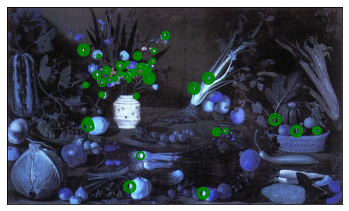

In [94]:
Angles = [MultiCornerness(car_gray, sigmas[i], rs[i], 0.5) for i in range(N)]

argu, indices = makeN3poly(Angles, sigmas)
interest_points_visualization(car, argu)

1364


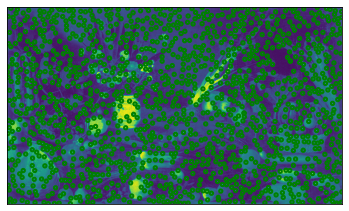

In [95]:
Cond=MultiCornerness(car_gray, sigmas[0], rs[0], 0.001)

points = np.sum(Cond==True)
scale = np.zeros(points)
scale.fill(sigmas[0])
argument=makeN3(Cond, scale)
interest_points_visualization(car_gray, argument)

21
25
20
10
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
45


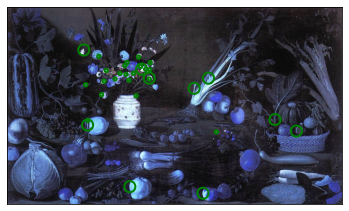

In [96]:
argument=delete_points(Angles,sigmas,Ls)
interest_points_visualization(car, argument)

110
67
34
16


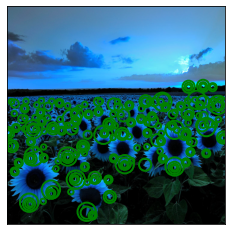

In [97]:
multi = MultiCornerness(sun_gray, sigma, r, 0.2)
Angles = [MultiCornerness(sun_gray, sigmas[i], rs[i], 0.2) for i in range(N)]

argu, indices = makeN3poly(Angles, sigmas)
interest_points_visualization(sun, argu)

110
67
34
16
[110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210]
101


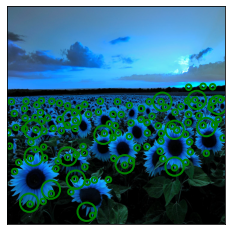

In [98]:
argument=delete_points(Angles,sigmas,Ls_sun)
interest_points_visualization(sun, argument)

## 2.5. Επιτάχυνση με την χρήση Box Filters και Ολοκληρωτικών Εικόνων (Integral Images)

### 2.5.1

Προκειμένου υπολογίσουμε την ολοκληρωτική εικόνα θα χρησιμοποιήσουμε την αναδρομική σχέση (17) του παραρτήματος για τις ολοκληρωτικές εικόνες. Όπως είναι φανερό πρέπει αρχικά να διατρέξουμε την εικόνα μας διαγώνια γεγονός που επιτυγχάνουμε με τα παρακάτω loop όπως αποδεικνύεται για έναν δοκιμαστικό πίνακα τυχαίων διαστάσεων.

In [99]:
WIDTH = 10
HEIGHT = 5

integral = np.zeros((HEIGHT, WIDTH))

count=0
for k in range(0, WIDTH + HEIGHT - 1):
    for j in range(k+1):
        i = k - j
        if i < HEIGHT and j < WIDTH:
            integral[i][j]=count
            count+=1

In [100]:
integral

array([[ 0.,  2.,  5.,  9., 14., 19., 24., 29., 34., 39.],
       [ 1.,  4.,  8., 13., 18., 23., 28., 33., 38., 43.],
       [ 3.,  7., 12., 17., 22., 27., 32., 37., 42., 46.],
       [ 6., 11., 16., 21., 26., 31., 36., 41., 45., 48.],
       [10., 15., 20., 25., 30., 35., 40., 44., 47., 49.]])

Στη συνέχεια εφαρμόζουμε τη σχέση αυτή στην εικόνα μας.

In [101]:
WIDTH = car_gray.shape[1]
HEIGHT = car_gray.shape[0]

integral = car_gray
    
for k in range(0, WIDTH + HEIGHT - 1):
    for j in range(k+1):
        i = k - j
        if i < HEIGHT and j < WIDTH:
            if j>0:
                integral[i][j]+=integral[i][j-1]
            if i>0:
                integral[i][j]+=integral[i-1][j]
            if j>0 and i>0 :
                integral[i][j]-=integral[i-1][j-1]
                
                
WIDTH = sun_gray.shape[1]
HEIGHT = sun_gray.shape[0]

integral_sun = sun_gray
    
for k in range(0, WIDTH + HEIGHT - 1):
    for j in range(k+1):
        i = k - j
        if i < HEIGHT and j < WIDTH:
            if j>0:
                integral_sun[i][j]+=integral_sun[i][j-1]
            if i>0:
                integral_sun[i][j]+=integral_sun[i-1][j]
            if j>0 and i>0 :
                integral_sun[i][j]-=integral_sun[i-1][j-1]

C:\anaconda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
C:\anaconda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app
C:\anaconda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in ubyte_scalars
C:\anaconda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in ubyte_scalars
C:\anaconda\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in ubyte_scalars


Οπτικά δεν έχει κάποια αξία να παρατηρήσουμε.

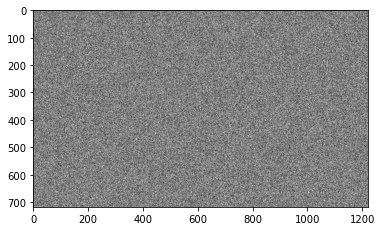

In [102]:
plt.imshow(integral, cmap='gray')

### 2.5.2

Επιχειρούμε να φτιάξουμε τα φίλτρα που φαίνονται στην εικόνα 2 σύμφωνα τις μετρικές για τα μεγέθη των D. Ουσιασικά γεμίζουμε αντίστοιχα κομμάτια της εικόνας με 1, -1 ή -2 και αφήνουμε τα υπόλοιπα μηδενικά.

In [120]:
def BoxFilters(s, integral):
    n = int(np.ceil(3*s)*2+1)
    
    u_corn=0.01
    Dxx = np.zeros((n,n))
    Dxy = np.zeros((n,n))

    q = int(np.floor(n/6))
    small=int(2*np.floor(n/6)+1)
    big=int(4*np.floor(n/6)+1)

    Dxx[((n//2+1)-q):((n//2+1)+q), :small]=1
    Dxx[((n//2+1)-q):((n//2+1)+q), small+1:2*small+1]=-2
    Dxx[((n//2+1)-q):((n//2+1)+q), 2*small+1:3*small+1]=1

    Dyy = np.transpose(Dxx)

    middle=n//2+1
    Dxy[middle-1-small:middle-1,middle-1-small:middle-1]=1
    Dxy[middle:middle+small,middle:middle+small]=1
    Dxy[middle-1-small:middle-1,middle:middle+small]=-1
    Dxy[middle:middle+small,middle-1-small:middle-1]=-1
    
    print(Dxx)
    print(Dxy)
    print(Dyy)
    
    Lxx = cv2.filter2D(integral ,-1, Dxx)
    Lxy = cv2.filter2D(integral ,-1, Dxy)
    Lyy = cv2.filter2D(integral ,-1, Dyy)

    CriterionR = np.multiply(Lxx, Lyy) - 0.81*np.multiply(Lxy, Lxy)
    
    B_sq = disk_strel(n)
    C1 = ( CriterionR==cv2.dilate(CriterionR,B_sq) )

    R_max = np.max(CriterionR)
    C2 = np.where(CriterionR>u_corn*R_max, 1, 0)

    Cond = C1&C2
    return Cond

In [121]:
BoxFilters(2.5,integral).sum()

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  0. -2. -2. -2. -2. -2.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  0. -2. -2. -2. -2. -2.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  0. -2. -2. -2. -2. -2.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  0. -2. -2. -2. -2. -2.  1.  1.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 

1060

### 2.5.3

In [116]:
ss = [2, 4, 6, 8, 10]
Angles = [BoxFilters(ss[i], integral) for i in range(len(ss))]

In [117]:
Angles[0].shape

(718, 1222)

In [118]:
for c, i in enumerate(Angles):
    print(np.sum(i))

727
343
205
111
80


727
343
205
111
80


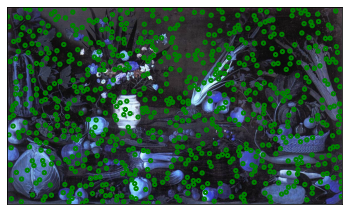

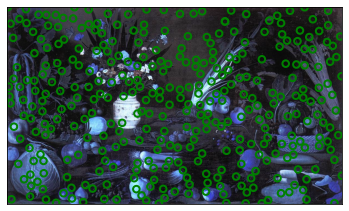

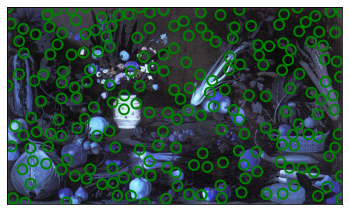

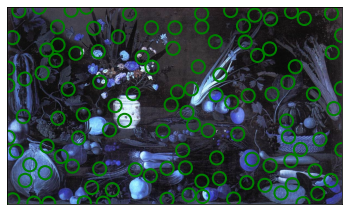

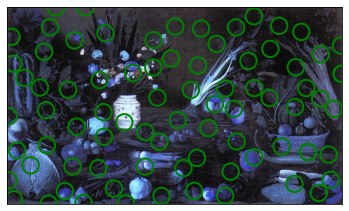

In [119]:
for i in range(len(ss)):    
    points = np.sum(Angles[i]==True)
    scale = np.zeros(points)
    scale.fill(ss[i])

    z=makeN3(Angles[i],scale)
    interest_points_visualization(car, z)

### 2.5.4

808
387
216
124
82


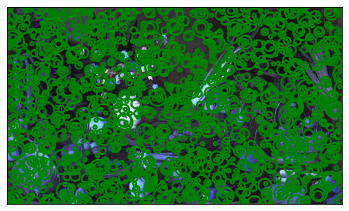

In [109]:
argu, _ = makeN3poly(Angles, ss)

interest_points_visualization(car, argu)

808
387
216
124
82
[808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 10

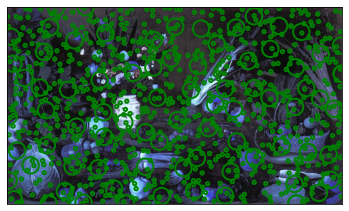

In [110]:
n = int(np.ceil(3*sigma))*2 + 1

N=len(ss)

LoGs = [fspecial_log(n,x)*(x**2) for x in ss]
Ls = [cv2.filter2D(car_gray,-1,LoGs[i]) for i in range(N)]

argu = delete_points(Angles, ss, Ls)

interest_points_visualization(car, argu)

234
101
49
35
27


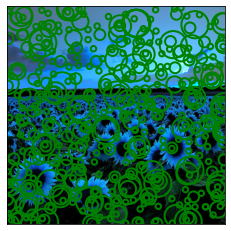

In [111]:
Angles = [BoxFilters(ss[i], integral_sun) for i in range(len(ss))]
argu, _ = makeN3poly(Angles, ss)

interest_points_visualization(sun, argu)

234
101
49
35
27
[234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418]
185


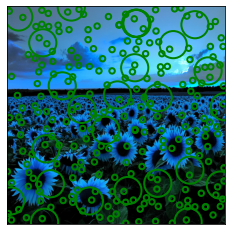

In [112]:
argu = delete_points(Angles, ss, Ls)

interest_points_visualization(sun, argu)

234
101
49
35
27


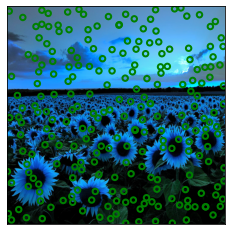

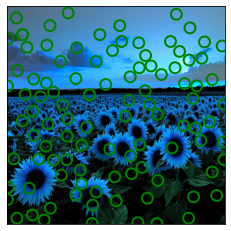

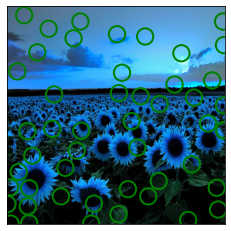

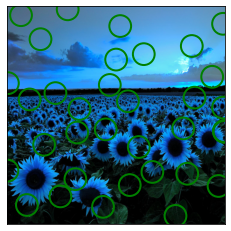

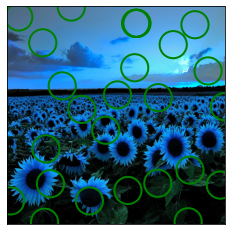

In [113]:
for i in range(len(ss)):    
    points = np.sum(Angles[i]==True)
    scale = np.zeros(points)
    scale.fill(ss[i])

    z=makeN3(Angles[i],scale)
    interest_points_visualization(sun, z)